In [41]:
import matplotlib.pyplot as plt
import requests
import math
from scipy import stats
import pandas as pd
from config import weather_api_key
import numpy as np
# from scipy.interpolate import interp1d
from datetime import datetime
# import matplotlib.dates as mdates
# import pytz
# import calendar

In [42]:
city= input("Type a city to find AQI analysis: ").lower()

geo_url = "http://api.openweathermap.org/geo/1.0/direct?q=" + city + "&appid=" + weather_api_key
lat_lon = requests.get(geo_url).json()


Type a city to find AQI analysis: New York


In [43]:
lat = str(lat_lon[0]["lat"])
lon = str(lat_lon[0]["lon"])

In [44]:
url = "http://api.openweathermap.org/data/2.5/air_pollution/history"
units = "imperial"
year = input("Please enter a value to analyze: ").lower()
if year == "2022":
    time_in_out = "&start=1641013200&end=1672549140"
if year == "2021":
    time_in_out = "&start=1609477200&end=1641013140"
if year == "winter":
    time_in_out = "&start=1638334800&end=1646110740"
if year == "spring":
    time_in_out = "&start=1646110800&end=1654055940"
if year == "summer":
    time_in_out = "&start=1654056000&end=1662004740"
if year == "fall":
    time_in_out = "&start=1662004800&end=1669870740"
print("--------------------------")
print("All set, working on that now.....")

final_url = url + "?lat=" + lat + "&lon=" + lon + time_in_out + "&appid=" + weather_api_key
print(final_url)

Please enter a value to analyze: 2022
--------------------------
All set, working on that now.....
http://api.openweathermap.org/data/2.5/air_pollution/history?lat=40.7127281&lon=-74.0060152&start=1641013200&end=1672549140&appid=155db15cf89682a55503d94f25dc4deb


In [45]:
aqi_num = requests.get(final_url).json()

In [46]:
aqi = []
time_stamp = []
ts = []

for day in range(len(aqi_num['list'])):
    aqi.append(aqi_num['list'][day]['main']['aqi'])
    time_stamp.append(aqi_num['list'][day]['dt'])
    
for time in time_stamp:
    ts.append(datetime.fromtimestamp(time).strftime("%m-%d-%Y"))

In [47]:
aqi_df = pd.DataFrame({
    "Human Time": ts,
    "AQI": aqi
})

#total_count = aqi_df["AQI"].count()


aqi_df["Human Time"] = pd.to_datetime(aqi_df["Human Time"], format="%m-%d-%Y")

aqi_groups = aqi_df.resample('D', on='Human Time').max()


# aqi_groups['AQI'].astype(int).groupby(aqi_groups['Human Time']).max()

aqi_sorted = aqi_groups["AQI"].value_counts().sort_index()
aqi_sorted.to_csv(f'{city}_AQI_{year}.csv', index=True)
aqi_days_df = pd.DataFrame(aqi_sorted)


holder_df = pd.DataFrame({
    "AQI":[0,0,0,0,0,0]})
aqi_groups = pd.concat([holder_df,aqi_days_df], axis=1).fillna(0).iloc[:,1][1:].astype(int)
annual_df = aqi_df.resample('w', on='Human Time').mean()

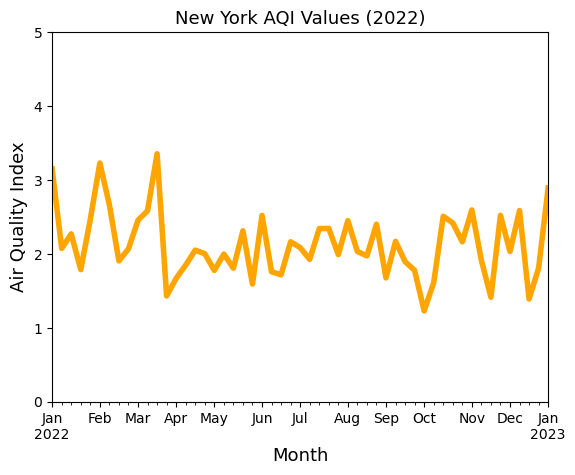

In [50]:
annual_df.plot(linewidth=4, legend=False, color="orange")
plt.ylim(0,5)
plt.title((f"New York AQI Values (2022)"), size = 13)
plt.ylabel("Air Quality Index", size=13)
plt.xlabel("Month", size=13)
plt.savefig("2022_NYC_AQI_LineGraph.png", transparent=True)
plt.show()

--------------------------
A bar graph has been created with your AQI data


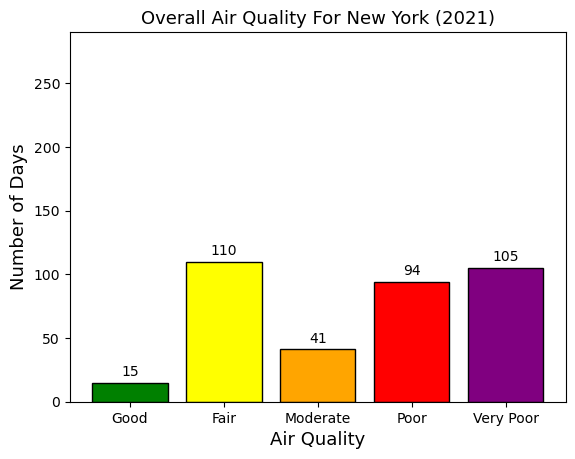

In [60]:
x = [1,2,3,4,5]
y = aqi_groups

labels = ['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor']
colors = ['green','yellow','orange','red', 'purple']

barplot = plt.bar(x, y, color=colors, align="center", edgecolor="black")
plt.bar_label(barplot, labels=y, label_type="edge", padding=3)
x_axis = np.arange(len(x))
plt.ylim(0,290)
plt.ylabel("Number of Days", size=13)
plt.xlabel("Air Quality", size =13)
tick_locations = [value for value in x]
plt.xticks(tick_locations, ['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor'])
plt.title((f"Overall Air Quality for {city} ({year})").title(), size = 13)
print("--------------------------")
print("A bar graph has been created with your AQI data")
plt.savefig(f"{city}_AQI_{year}.png", transparent=True)
plt.show()
